# Pakiet pandas - tutorial

## Wstęp
Pandas jest wykorzystywany do pracy z danymi tabelarycznymi - np. danymi z arkuszy kalkulacyjnych bądź baz danych. Pakiet jest przydatny w eksploracji, czyszczeniu i przetwarzaniu danych. W pandasie dane tabularyczne nazywa się **DataFrame**. Każda zmienna zapisywana jest w kolumnie, zaś każda obserwacja w wierszu.

<!-- 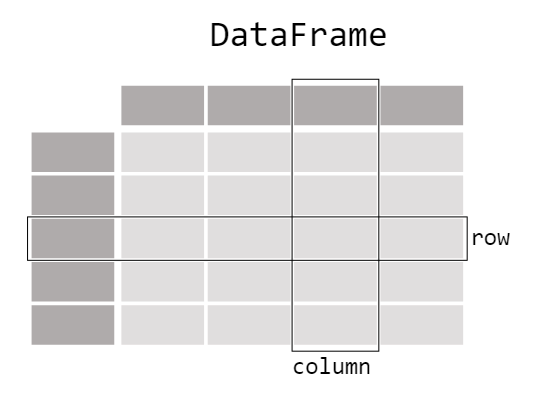 -->

## Tworzenie DataFrame
Ramkę danych można stworzyć na wiele sposobów: z plików różnego rodzaju, słownika, listy, numpy.array, itp.
### Tworzenie DataFrame ze słownika

In [1]:
import pandas as pd
import numpy as np

In [2]:
data_dict = {'column_1': ['variable_1', 'variable_2'], 'column_2': [1, 3], 'column_3': ['variable_1', 'variable_2']}
df_from_dict = pd.DataFrame(data=data_dict)

In [3]:
df_from_dict

,column_1,column_2,column_3
0,variable_1,1,variable_1
1,variable_2,3,variable_2


### Tworzenie DataFrame z list

In [4]:
df_from_list = pd.DataFrame(data=[['variable_1', 1, 'variable_1'], # przypisanie wierszy w formie listy
                                  ['variable_2', 3, 'variable_2']],
                           columns=['column_1', 'column_2', 'column_3'], # zdefiniowanie nazw kolumn
                           index=['index_1', 'index_2'] # zdefiniowanie nazw indeksow
                           )

In [5]:
df_from_list

,column_1,column_2,column_3
index_1,variable_1,1,variable_1
index_2,variable_2,3,variable_2


### Wczytywanie DataFrame z pliku
DataFrame można wczytać z wszelkiego rodzaju plików: csv, xls, parquet, json, sql, gbq (tabela z Google BigQuery) i wielu innych. W tym celu wystarczy użyć funkcji **read_*** gdzie * oznacza rodzaj pliku. Na przykład chcąc wczytać plik csv użyjemy funkcji **read_csv**.

Analogicznie chcąc zapisać DataFrame używa się funkcji **to_*** gdzie * oznacza rodzaj pliku.

In [6]:
df = pd.read_csv(filepath_or_buffer='mpg.csv', # sciezka do pliku
                sep=',', # separator
                header=0, # naglowek (nazwy kolumn)
                index_col=0 # kolumna z indeksem
                )

In [7]:
# Wyswietlenie pierwszych 5 wierszy
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


## Podstawowe funkcje
Pandas posiada wiele wbudowanych funkcji, dzięki którym można lepiej poznać dane. Poniżej przedstawiono część z nich.

In [8]:
# Rozmiar ramki danych
df.shape

(398, 9)

In [9]:
# Podsumowanie DataFrame - typy danych, ilosc, liczba wartosci niezerowych (tych ktore nie sa null)
df.info() 

<class 'pandas.core.frame.DataFrame'>
Index: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    object 
 8   name          398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 31.1+ KB


In [10]:
# Wyswietlenie typow danych
df.dtypes 

mpg             float64
cylinders         int64
displacement    float64
horsepower      float64
weight            int64
acceleration    float64
model_year        int64
origin           object
name             object
dtype: object

In [11]:
# Statystyki opisowych
df.describe() 

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
count,398.000000,398.000000,398.000000,392.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.469388,2970.424623,15.568090,76.010050
std,7.815984,1.701004,104.269838,38.491160,846.841774,2.757689,3.697627
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000
25%,17.500000,4.000000,104.250000,75.000000,2223.750000,13.825000,73.000000
50%,23.000000,4.000000,148.500000,93.500000,2803.500000,15.500000,76.000000
75%,29.000000,8.000000,262.000000,126.000000,3608.000000,17.175000,79.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000


In [12]:
# To samo tylko dla okreslonych typow danych (domyslnie bierze tylko zmienne numeryczne)
df.describe(include='object') 

,origin,name
count,398,398
unique,3,305
top,usa,ford pinto
freq,249,6


In [13]:
# Lista nazw kolumn
df.columns 

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model_year', 'origin', 'name'],
      dtype='object')

In [14]:
# Lista indeksow
df.index

Index([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,
       ...
       388, 389, 390, 391, 392, 393, 394, 395, 396, 397],
      dtype='int64', length=398)

In [15]:
# Ilosc unikalnych wartosci w okreslonych kolumnach
df.nunique() 

mpg             129
cylinders         5
displacement     82
horsepower       93
weight          351
acceleration     95
model_year       13
origin            3
name            305
dtype: int64

In [16]:
# Unikalne wartosci w kolumnie cylinders wraz
# z liczba wystapien w znormalizowanej formie (procent ogolu)
df['cylinders'].value_counts(normalize=True)

cylinders
4    0.512563
8    0.258794
6    0.211055
3    0.010050
5    0.007538
Name: proportion, dtype: float64

**Inne podstawowe funkcje**

|funkcja|opis|
|--|--|
|min()|wartosc minimalna|
|max()|wartosc maksymalna|
|count()|liczba wartosci|
|sum()|suma wartosci|
|median()|mediana|
|quantile([0.25, 0.75])|kwantyle (mozna wprowadzic inne niz [0.25, 0.75])|
|mean()|srednia|
|std()|odchylenie standardowe|
|apply(*function*)|dzialanie na DataFrame inna funkcja|

In [17]:
df['weight'].std()

846.8417741973271

In [18]:
df.max()

mpg                         46.6
cylinders                      8
displacement               455.0
horsepower                 230.0
weight                      5140
acceleration                24.8
model_year                    82
origin                       usa
name            vw rabbit custom
dtype: object

In [19]:
# Macierz korelacji, parametr numeric_only = True pozwala sprawnie pominac zmienne nienumeryczne w kalkulacji
df.corr(method='spearman', numeric_only=True)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
mpg,1.000000,-0.821864,-0.855692,-0.853616,-0.874947,0.438677,0.573469
cylinders,-0.821864,1.000000,0.911876,0.816188,0.873314,-0.474189,-0.335012
displacement,-0.855692,0.911876,1.000000,0.876171,0.945986,-0.496512,-0.305257
horsepower,-0.853616,0.816188,0.876171,1.000000,0.878819,-0.658142,-0.389498
weight,-0.874947,0.873314,0.945986,0.878819,1.000000,-0.404550,-0.277015
acceleration,0.438677,-0.474189,-0.496512,-0.658142,-0.404550,1.000000,0.274632
model_year,0.573469,-0.335012,-0.305257,-0.389498,-0.277015,0.274632,1.000000


## Tworzenie podzbiorów

In [20]:
# Pierwsze 3 wiersze (nie wpisujac zadnej liczby domyslnie brana jest 5)
df.head(3) 

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite


In [21]:
# Wiersze z okreslonego zakresu indeksow
df[27:33] 

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
27,11.0,8,318.0,210.0,4382,13.5,70,usa,dodge d200
28,9.0,8,304.0,193.0,4732,18.5,70,usa,hi 1200d
29,27.0,4,97.0,88.0,2130,14.5,71,japan,datsun pl510
30,28.0,4,140.0,90.0,2264,15.5,71,usa,chevrolet vega 2300
31,25.0,4,113.0,95.0,2228,14.0,71,japan,toyota corona
32,25.0,4,98.0,NaN,2046,19.0,71,usa,ford pinto


In [22]:
# Ostatnie 8 wierzy (nie wpisujac zadnej liczby domyslnie brana jest 5)
df.tail(8) 

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
390,32.0,4,144.0,96.0,2665,13.9,82,japan,toyota celica gt
391,36.0,4,135.0,84.0,2370,13.0,82,usa,dodge charger 2.2
392,27.0,4,151.0,90.0,2950,17.3,82,usa,chevrolet camaro
393,27.0,4,140.0,86.0,2790,15.6,82,usa,ford mustang gl
394,44.0,4,97.0,52.0,2130,24.6,82,europe,vw pickup
395,32.0,4,135.0,84.0,2295,11.6,82,usa,dodge rampage
396,28.0,4,120.0,79.0,2625,18.6,82,usa,ford ranger
397,31.0,4,119.0,82.0,2720,19.4,82,usa,chevy s-10


In [23]:
# Ostatnie 8 wierszy (drugi sposob)
df[-8:] 

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
390,32.0,4,144.0,96.0,2665,13.9,82,japan,toyota celica gt
391,36.0,4,135.0,84.0,2370,13.0,82,usa,dodge charger 2.2
392,27.0,4,151.0,90.0,2950,17.3,82,usa,chevrolet camaro
393,27.0,4,140.0,86.0,2790,15.6,82,usa,ford mustang gl
394,44.0,4,97.0,52.0,2130,24.6,82,europe,vw pickup
395,32.0,4,135.0,84.0,2295,11.6,82,usa,dodge rampage
396,28.0,4,120.0,79.0,2625,18.6,82,usa,ford ranger
397,31.0,4,119.0,82.0,2720,19.4,82,usa,chevy s-10


In [24]:
 # Wybranie konkretnych kolumn
df[['cylinders', 'horsepower']].head()

,cylinders,horsepower
0,8,130.0
1,8,165.0
2,8,150.0
3,8,150.0
4,8,140.0


In [25]:
# Wartosci konkretnej kolumny z okreslonego zakresu wierszy
df.cylinders[15:23]

15    6
16    6
17    6
18    4
19    4
20    4
21    4
22    4
Name: cylinders, dtype: int64


<div class="alert alert-block alert-info">
<b>Info</b> 

Chcąc działać na wierszach spełniających konkretne warunki warto tworzyć zmienną maskujacą (która zwraca wartość True/False dla każdego wiersza) i następnie pisać df[mask] zamiast df[((pierwszy warunek) | (drugi warunek)) & (trzeci warunek)]. Wizualnie wygląda to dużo lepiej.
</div>

In [26]:
# Chcemy wiersze gdzie model_year jest co najwyzej 70 a zmienna origin miesci sie w zbiorze 'japan' i 'europe'
mask = (df['model_year']<=70) & (df['origin'].isin(['japan', 'europe']))
mask

0      False
1      False
2      False
3      False
4      False
       ...  
393    False
394    False
395    False
396    False
397    False
Length: 398, dtype: bool

In [27]:
df[mask]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
14,24.0,4,113.0,95.0,2372,15.0,70,japan,toyota corona mark ii
18,27.0,4,97.0,88.0,2130,14.5,70,japan,datsun pl510
19,26.0,4,97.0,46.0,1835,20.5,70,europe,volkswagen 1131 deluxe sedan
20,25.0,4,110.0,87.0,2672,17.5,70,europe,peugeot 504
21,24.0,4,107.0,90.0,2430,14.5,70,europe,audi 100 ls
22,25.0,4,104.0,95.0,2375,17.5,70,europe,saab 99e
23,26.0,4,121.0,113.0,2234,12.5,70,europe,bmw 2002


In [28]:
# Wybieranie losowych wierszy
df.sample(5)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
323,27.9,4,156.0,105.0,2800,14.4,80,usa,dodge colt
295,35.7,4,98.0,80.0,1915,14.4,79,usa,dodge colt hatchback custom
12,15.0,8,400.0,150.0,3761,9.5,70,usa,chevrolet monte carlo
163,18.0,6,225.0,95.0,3785,19.0,75,usa,plymouth fury
178,23.0,4,120.0,88.0,2957,17.0,75,europe,peugeot 504



<div class="alert alert-block alert-info">
<b>Info</b> 

Przydatnymi funkcjami w selekcji specyficznych wierszy/kolumn są .loc oraz .iloc. Zwłaszcza wtedy kiedy chcemy nadpisać jakąś wartość w DataFramie.
</div>

In [29]:
# Wybranie wszystkich wierszy i kolumn z zakresu 5:9
df.iloc[:,5:9] 

,acceleration,model_year,origin,name
0,12.0,70,usa,chevrolet chevelle malibu
1,11.5,70,usa,buick skylark 320
2,11.0,70,usa,plymouth satellite
3,12.0,70,usa,amc rebel sst
4,10.5,70,usa,ford torino
...,...,...,...,...
393,15.6,82,usa,ford mustang gl
394,24.6,82,europe,vw pickup
395,11.6,82,usa,dodge rampage
396,18.6,82,usa,ford ranger


In [30]:
# Wybranie wszystkich wierszy i kolumn z zakresu 5:9 (po nazwach)
df.loc[:,'acceleration':'name'] 

,acceleration,model_year,origin,name
0,12.0,70,usa,chevrolet chevelle malibu
1,11.5,70,usa,buick skylark 320
2,11.0,70,usa,plymouth satellite
3,12.0,70,usa,amc rebel sst
4,10.5,70,usa,ford torino
...,...,...,...,...
393,15.6,82,usa,ford mustang gl
394,24.6,82,europe,vw pickup
395,11.6,82,usa,dodge rampage
396,18.6,82,usa,ford ranger


## Operacje na danych
### Nadpisanie określonej wartości

W tym przypadku zmienimy wartość 'horsepower' dla drugiej obserwacji na null

In [31]:
df.iloc[1,:]

mpg                          15.0
cylinders                       8
displacement                350.0
horsepower                  165.0
weight                       3693
acceleration                 11.5
model_year                     70
origin                        usa
name            buick skylark 320
Name: 1, dtype: object

In [32]:
df.loc[1,'horsepower'] = np.nan

In [33]:
df.iloc[1,:]

mpg                          15.0
cylinders                       8
displacement                350.0
horsepower                    NaN
weight                       3693
acceleration                 11.5
model_year                     70
origin                        usa
name            buick skylark 320
Name: 1, dtype: object

### Sortowanie i resetowanie indeksów

In [34]:
df.sort_values(by=['model_year', 'horsepower', 'name'], # kolumny sortujace
              ascending=False, # kolejnosc malejaca
              inplace=True # nadpisanie aktualnej ramki danych
              )

In [35]:
# Wyswietlenie posortowanego DataFrame. Zauwazyc mozna, ze indeksy nie ukladaja sie od poczatku. Pozostal stary porzadek
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
389,22.0,6,232.0,112.0,2835,14.7,82,usa,ford granada l
386,25.0,6,181.0,110.0,2945,16.4,82,usa,buick century limited
390,32.0,4,144.0,96.0,2665,13.9,82,japan,toyota celica gt
373,24.0,4,140.0,92.0,2865,16.4,82,usa,ford fairmont futura
388,26.0,4,156.0,92.0,2585,14.5,82,usa,chrysler lebaron medallion


In [36]:
df.reset_index(inplace=True, # nadpisanie aktualnej ramki danych
              drop=True # usuniecie poprzednich indeksow
              )

In [37]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,22.0,6,232.0,112.0,2835,14.7,82,usa,ford granada l
1,25.0,6,181.0,110.0,2945,16.4,82,usa,buick century limited
2,32.0,4,144.0,96.0,2665,13.9,82,japan,toyota celica gt
3,24.0,4,140.0,92.0,2865,16.4,82,usa,ford fairmont futura
4,26.0,4,156.0,92.0,2585,14.5,82,usa,chrysler lebaron medallion


### Grupowanie danych
Poniżej przedstawiono przykład grupowania kolumny **horsepower** i **model_year** ze względu na kolumne **cylinders**.

Funkcja max pokazuje jaką funkcją działamy na pogrupowane dane - w tym przypadku zostawiamy wartość maksymalną każdej podgrupy. Równie dobrze można użyć pozostałych funkcji, które zostały wcześniej przedstawione.

Funkcja reset_index() przenosi indeksy (w tym przypadku cylinders) do kolumny.

In [38]:
grouped = df.groupby(by='cylinders')[['horsepower','model_year']].max()

In [39]:
grouped

,horsepower,model_year
cylinders,,
3,110.0,80
4,115.0,82
5,103.0,80
6,165.0,82
8,230.0,81


In [40]:
grouped = grouped.reset_index()
grouped

,cylinders,horsepower,model_year
0,3,110.0,80
1,4,115.0,82
2,5,103.0,80
3,6,165.0,82
4,8,230.0,81


#### Działanie różnymi funkcjami na każdą z kolumn

In [41]:
def median_mean(x):
    return x.median() - x.mean()

df.groupby(by='cylinders')[['horsepower','model_year']].agg({'horsepower': ['sum', 'max'], # dzialanie lista funkcji
                                                             'model_year': median_mean}) # dzialanie wlasna funkcja                                                           

horsepower         model_year
                 sum    max median_mean
cylinders                              
3              397.0  110.0   -0.500000
4            15578.0  115.0    0.926471
5              247.0  103.0    0.000000
6             8425.0  165.0    0.071429
8            16140.0  230.0   -0.902913

### Funkcja lambda


<div class="alert alert-block alert-info">
<b>Info</b> 

Funkcja lambda jest bardzo przydatnym narzędziem. Działając funkcją lambda na ramkę danych prawdopodobnie nasze obliczenia wykonaja się szybciej niż robienie pętli czy innych operacji.
</div>

In [42]:
# Na poczatku przygotujemy pogrupowana ramke danych. 
# Tym razem na pogrupowane dane zadzialamy w taki sposob ze dla kazdej grupy utworzymy liste wartosci ktore naleza do grupy
grouped2 = df.groupby(by='cylinders')['horsepower'].apply(list).reset_index()

In [43]:
grouped2

,cylinders,horsepower
0,3,"[100.0, 110.0, 90.0, 97.0]"
1,4,"[96.0, 92.0, 92.0, 90.0, 90.0, 88.0, 88.0, 88...."
2,5,"[67.0, 77.0, 103.0]"
3,6,"[112.0, 110.0, 85.0, 120.0, 116.0, 110.0, 110...."
4,8,"[105.0, 155.0, 150.0, 142.0, 138.0, 135.0, 130..."


Zauwazyć można, ze wartośći w liscie sie powtarzają. Pozbyć się ich mozemy dzieki wyrażeniu lambda

In [44]:
grouped2['unique_horsepower'] = grouped2['horsepower'].apply(lambda x: list(dict.fromkeys(x)))

In [45]:
grouped2

,cylinders,horsepower,unique_horsepower
0,3,"[100.0, 110.0, 90.0, 97.0]","[100.0, 110.0, 90.0, 97.0]"
1,4,"[96.0, 92.0, 92.0, 90.0, 90.0, 88.0, 88.0, 88....","[96.0, 92.0, 90.0, 88.0, 86.0, 85.0, 84.0, 82...."
2,5,"[67.0, 77.0, 103.0]","[67.0, 77.0, 103.0]"
3,6,"[112.0, 110.0, 85.0, 120.0, 116.0, 110.0, 110....","[112.0, 110.0, 85.0, 120.0, 116.0, 88.0, 76.0,..."
4,8,"[105.0, 155.0, 150.0, 142.0, 138.0, 135.0, 130...","[105.0, 155.0, 150.0, 142.0, 138.0, 135.0, 130..."


In [46]:
len(grouped2.loc[1,'horsepower'])

204

In [47]:
len(grouped2.loc[1,'unique_horsepower'])

56

### Tworzenie nowych kolumn

In [48]:
df[pd.isnull(df.horsepower)]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
30,23.0,4,151.0,NaN,3035,20.5,82,usa,amc concord dl
59,34.5,4,100.0,NaN,2320,15.8,81,europe,renault 18i
87,40.9,4,85.0,NaN,1835,17.3,80,europe,renault lecar deluxe
88,23.6,4,140.0,NaN,2905,14.3,80,usa,ford mustang cobra
272,21.0,6,200.0,NaN,2875,17.0,74,usa,ford maverick
368,25.0,4,98.0,NaN,2046,19.0,71,usa,ford pinto
397,15.0,8,350.0,NaN,3693,11.5,70,usa,buick skylark 320



<div class="alert alert-block alert-info">
<b>Info</b> 

W wyrażeniu lambda tworząc instrukcję warunkową if-else nie używamy standardowej struktury:
```    
if (condition):   
  do sth    
else:    
  do sth
```    
Zamiast tego używamy struktury jednowierszowej:
```
do sth if (condtion) else do sth 
```
</div>

In [49]:
# Tworzymy nowa kolumne w taki sposob, ze wartosc nowej kolumny jest
# rowna kolumnie 'horsepower' jesli 'acceleration' jest null (lub odwrotnie)
# albo mnozeniu horsepower i aceeleration jesli obie wartosci nie sa null

# W tym przypadku tworzymy wyrazenie lambda na calej ramce danych (nie na kolumnie jak bylo to wyzej).
# Wazne jest aby w tym przypadku na koncu dodac axis=1.

df['horsepower*acceleration'] = df.apply(lambda row: 
                                         row['horsepower'] # Tworzymy wyrazenie warunkowe (Zwroc uwage na strukture!)
                                         if pd.isnull(row['acceleration'])
                                         else
                                             row['acceleration'] 
                                             if pd.isnull(row['horsepower'])
                                             else
                                                 row['horsepower']*row['acceleration'],
                                         axis=1
                                        )


In [50]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name,horsepower*acceleration
0,22.0,6,232.0,112.0,2835,14.7,82,usa,ford granada l,1646.4
1,25.0,6,181.0,110.0,2945,16.4,82,usa,buick century limited,1804.0
2,32.0,4,144.0,96.0,2665,13.9,82,japan,toyota celica gt,1334.4
3,24.0,4,140.0,92.0,2865,16.4,82,usa,ford fairmont futura,1508.8
4,26.0,4,156.0,92.0,2585,14.5,82,usa,chrysler lebaron medallion,1334.0


**II sposób**

Wyniesienie wnętrza funkcji lambda do osobnej funkcji. Sprawia to, że kod staje się bardziej przejrzysty.

In [51]:
def row_operation(x):
    if pd.isnull(x['acceleration']):
        return x['horsepower']
    else:
        if pd.isnull(x['horsepower']):
            return x['acceleration']
        else:
            return x['horsepower']*x['acceleration']

df['horsepower*acceleration'] = df.apply(lambda row: row_operation(row), axis=1)
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name,horsepower*acceleration
0,22.0,6,232.0,112.0,2835,14.7,82,usa,ford granada l,1646.4
1,25.0,6,181.0,110.0,2945,16.4,82,usa,buick century limited,1804.0
2,32.0,4,144.0,96.0,2665,13.9,82,japan,toyota celica gt,1334.4
3,24.0,4,140.0,92.0,2865,16.4,82,usa,ford fairmont futura,1508.8
4,26.0,4,156.0,92.0,2585,14.5,82,usa,chrysler lebaron medallion,1334.0


### Tworzenie nowych wierszy

In [52]:
# Tworzymy liste wartosci, ktore chcemy dopisac do ramki danych
row_list = [31.0, 4, 119.0, 82.0, 2720, 19.4, 82, 'usa', 'chevy s-10', 1590.8]

# Przy pomocy loc dopisujemy wiersz z indeksem 398
df.loc[398,:] = row_list

In [53]:
# Tworzymy nowy DataFrame ze slownika po czym dolaczamy do naszej ramki danych
# Mozemy do tego skozystac  z funkcji concat, o jej kolejnym zasotoswaniu dalej :)
row_dict = {'mpg': [31.0], 'cylinders': [4], 'displacement': [119.0],
            'horsepower': [82.0], 'weight': [2720], 'acceleration': [19.4],
            'model_year': [82], 'origin': ['usa'], 'name': ['chevy s-10'], 'horsepower*acceleration': [1590.8]}
df_to_concat = pd.DataFrame(data = row_dict)
df = pd.concat([df,df_to_concat])

In [54]:
# Dodajac nowa ramke danych zauwazyc mozna ze indeksy pozostaja takie same jak w oryginalnych ramkach danych

df.tail()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name,horsepower*acceleration
395,21.0,6.0,200.0,85.0,2587.0,16.0,70.0,usa,ford maverick,1360.0
396,26.0,4.0,97.0,46.0,1835.0,20.5,70.0,europe,volkswagen 1131 deluxe sedan,943.0
397,15.0,8.0,350.0,NaN,3693.0,11.5,70.0,usa,buick skylark 320,11.5
398,31.0,4.0,119.0,82.0,2720.0,19.4,82.0,usa,chevy s-10,1590.8
0,31.0,4.0,119.0,82.0,2720.0,19.4,82.0,usa,chevy s-10,1590.8


In [55]:
df.reset_index(inplace=True, drop=True) #inna opcja jest uzycie ignore_index=True podczas uzywania pd.concat

In [56]:
df.tail()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name,horsepower*acceleration
395,21.0,6.0,200.0,85.0,2587.0,16.0,70.0,usa,ford maverick,1360.0
396,26.0,4.0,97.0,46.0,1835.0,20.5,70.0,europe,volkswagen 1131 deluxe sedan,943.0
397,15.0,8.0,350.0,NaN,3693.0,11.5,70.0,usa,buick skylark 320,11.5
398,31.0,4.0,119.0,82.0,2720.0,19.4,82.0,usa,chevy s-10,1590.8
399,31.0,4.0,119.0,82.0,2720.0,19.4,82.0,usa,chevy s-10,1590.8


### Usuwanie danych

In [57]:
# Uwsuwanie wierszy
df.drop(index=399, inplace=True)
df.tail()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name,horsepower*acceleration
394,25.0,4.0,110.0,87.0,2672.0,17.5,70.0,europe,peugeot 504,1522.5
395,21.0,6.0,200.0,85.0,2587.0,16.0,70.0,usa,ford maverick,1360.0
396,26.0,4.0,97.0,46.0,1835.0,20.5,70.0,europe,volkswagen 1131 deluxe sedan,943.0
397,15.0,8.0,350.0,NaN,3693.0,11.5,70.0,usa,buick skylark 320,11.5
398,31.0,4.0,119.0,82.0,2720.0,19.4,82.0,usa,chevy s-10,1590.8


In [58]:
# Usuwanie kolumny
df.drop(columns='horsepower*acceleration', inplace=True)
df[:5]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,22.0,6.0,232.0,112.0,2835.0,14.7,82.0,usa,ford granada l
1,25.0,6.0,181.0,110.0,2945.0,16.4,82.0,usa,buick century limited
2,32.0,4.0,144.0,96.0,2665.0,13.9,82.0,japan,toyota celica gt
3,24.0,4.0,140.0,92.0,2865.0,16.4,82.0,usa,ford fairmont futura
4,26.0,4.0,156.0,92.0,2585.0,14.5,82.0,usa,chrysler lebaron medallion


### Działania na wartościach nullowych

In [59]:
# Patrzymy czy ktorykolwiek (any) wiersz (axis=1) jest rowny null
mask = df.isnull().any(axis=1)
mask

0      False
1      False
2      False
3      False
4      False
       ...  
394    False
395    False
396    False
397     True
398    False
Length: 399, dtype: bool

In [60]:
df[mask]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
30,23.0,4.0,151.0,NaN,3035.0,20.5,82.0,usa,amc concord dl
59,34.5,4.0,100.0,NaN,2320.0,15.8,81.0,europe,renault 18i
87,40.9,4.0,85.0,NaN,1835.0,17.3,80.0,europe,renault lecar deluxe
88,23.6,4.0,140.0,NaN,2905.0,14.3,80.0,usa,ford mustang cobra
272,21.0,6.0,200.0,NaN,2875.0,17.0,74.0,usa,ford maverick
368,25.0,4.0,98.0,NaN,2046.0,19.0,71.0,usa,ford pinto
397,15.0,8.0,350.0,NaN,3693.0,11.5,70.0,usa,buick skylark 320



<div class="alert alert-block alert-info">
<b>Info</b> 

Nie ma prostej odpowiedzi jak zastąpić wartości nullowe. Wszystko zależy od tego na jakim zbiorze pracujemy. Czasem wiersze posiadające nulle sa usuwane o ile ich liczebność stanowi odsetek całego zbioru. Prostą metodą jest zastąpienie nulli wartością średnią lub medianą dla danych grup (tj. np. średnia wartość horsepower dla samochodów z 4 cylindrami gdzie model_year jest powyżej 80). Wszystko zależy od badanego problemu.
</div>

In [61]:
df.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
count,399.000000,399.000000,399.000000,392.000000,399.000000,399.000000,399.000000
mean,23.533333,5.451128,193.239348,104.257653,2969.796992,15.577694,76.025063
std,7.815149,1.700426,104.205397,38.385478,845.870145,2.760895,3.705133
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000
25%,17.500000,4.000000,104.500000,75.000000,2224.500000,13.850000,73.000000
50%,23.000000,4.000000,146.000000,92.500000,2800.000000,15.500000,76.000000
75%,29.000000,8.000000,262.000000,125.000000,3607.000000,17.200000,79.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000


In [62]:
df[df['weight']<2000].describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
count,43.000000,43.0,43.000000,42.000000,43.000000,43.000000,43.000000
mean,33.209302,4.0,87.534884,63.714286,1890.627907,16.932558,77.209302
std,4.545789,0.0,8.404502,8.267733,95.710880,2.278650,3.549367
min,26.000000,4.0,68.000000,46.000000,1613.000000,12.200000,70.000000
25%,29.900000,4.0,83.000000,60.000000,1829.500000,15.250000,74.500000
50%,32.800000,4.0,90.000000,66.500000,1937.000000,16.500000,78.000000
75%,36.050000,4.0,91.000000,69.750000,1969.000000,18.900000,80.000000
max,44.600000,4.0,105.000000,80.000000,1995.000000,21.500000,82.000000


Widać, że konie mechaniczne samochodów z wagą poniżej 2000 różnią sie statystykami od reszty zbioru. Z tego względu wartość null dla wiersza 330 nadpiszemy średnią wartoscią 'horsepower' dla samochodów z wagą 2000 (zauważ, że mediana i średnia są do siebie zbliżone).

In [63]:
low_weight_mean = int(df[df['weight']<2000]['horsepower'].mean()) # int bo nie moze byc polowa konia mechanicznego

# Do nadpisywania wartosci nullowych sluzy funkcja fillna()
df.loc[df['weight']<2000, 'horsepower'] = df.loc[df['weight']<2000, 'horsepower'].fillna(low_weight_mean)

In [64]:
df[mask]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
30,23.0,4.0,151.0,NaN,3035.0,20.5,82.0,usa,amc concord dl
59,34.5,4.0,100.0,NaN,2320.0,15.8,81.0,europe,renault 18i
87,40.9,4.0,85.0,63.0,1835.0,17.3,80.0,europe,renault lecar deluxe
88,23.6,4.0,140.0,NaN,2905.0,14.3,80.0,usa,ford mustang cobra
272,21.0,6.0,200.0,NaN,2875.0,17.0,74.0,usa,ford maverick
368,25.0,4.0,98.0,NaN,2046.0,19.0,71.0,usa,ford pinto
397,15.0,8.0,350.0,NaN,3693.0,11.5,70.0,usa,buick skylark 320


In [65]:
# Usuwanie wierszy z nullami
df = df.dropna()
df.reset_index(drop=True, inplace=True)

### Usuwanie duplikatów

In [66]:
# Zauwazmy ze mamy duplikat (indeks 392 i 17)
df[df['name'] == 'chevy s-10']

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
17,31.0,4.0,119.0,82.0,2720.0,19.4,82.0,usa,chevy s-10
392,31.0,4.0,119.0,82.0,2720.0,19.4,82.0,usa,chevy s-10


In [67]:
df.drop_duplicates(inplace=True)

In [68]:
df[df['name'] == 'chevy s-10']

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
17,31.0,4.0,119.0,82.0,2720.0,19.4,82.0,usa,chevy s-10


### Zmiana nazw kolumn

In [69]:
# Do parametru columns przypisujemy slownik gdzie klucze to aktualna nazwa kolumny a wartosci to nowe nazwy
df.rename(columns = {'mpg': 'miles_per_gallon'}, inplace=True)
df.head()

,miles_per_gallon,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,22.0,6.0,232.0,112.0,2835.0,14.7,82.0,usa,ford granada l
1,25.0,6.0,181.0,110.0,2945.0,16.4,82.0,usa,buick century limited
2,32.0,4.0,144.0,96.0,2665.0,13.9,82.0,japan,toyota celica gt
3,24.0,4.0,140.0,92.0,2865.0,16.4,82.0,usa,ford fairmont futura
4,26.0,4.0,156.0,92.0,2585.0,14.5,82.0,usa,chrysler lebaron medallion


### Zmiana danych liczbowych na kategorie


<div class="alert alert-block alert-info">
<b>Info</b> 

Czasem bardziej miarodajna jest informacja, że dany obiekt należy do jakiejś grupy zamiast przypisanej do niego konkretnej liczby. Np. znając wzrost i wagę danego pacjeta można stworzyć zmienną kategoryczną oznaczającą jak bardzo otyły jest pacjent. 
</div>

In [70]:
print(f"light weight count {len(df[df.weight<=2000])}")
print(f"normal weight {len(df[(df.weight>2000) & (df.weight<=3600)])}")
print(f"heavy weight count {len(df[df.weight>3600])}")

light weight count 44
normal weight 248
heavy weight count 100


In [71]:
# Stworzenie 3 przedzialow (waga do 2000, miedzy 2000 a 3600 i powyzej 3600)
bins = pd.IntervalIndex.from_tuples([(df['weight'].min()-1, 2000),(2000, 3600),(3600, df['weight'].max()+1)])

# Przypisanie wartosci kolumny 'weight' do odpowiedniego przedzialu
x = pd.cut(df['weight'].to_list(), bins)
x = x.rename_categories(['light_weight', 'normal_weight', 'heavy_weight'])

# Stworzenie nowej kolumny z kategoriami
df['weight_category'] = x

In [72]:
df.tail()

,miles_per_gallon,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name,weight_category
387,21.0,6.0,199.0,90.0,2648.0,15.0,70.0,usa,amc gremlin,normal_weight
388,27.0,4.0,97.0,88.0,2130.0,14.5,70.0,japan,datsun pl510,normal_weight
389,25.0,4.0,110.0,87.0,2672.0,17.5,70.0,europe,peugeot 504,normal_weight
390,21.0,6.0,200.0,85.0,2587.0,16.0,70.0,usa,ford maverick,normal_weight
391,26.0,4.0,97.0,46.0,1835.0,20.5,70.0,europe,volkswagen 1131 deluxe sedan,light_weight


### Iterowanie po kolejnych wierszach

Chcąc napisać pętlę, która będzie iterowana po kolejnych wierszach można użyć funkcji iterrows.

In [73]:
for i, row in df[:5].iterrows():
    print(f'Indeks: {i}, Liczba koni mechanicznych: {row.horsepower}')

Indeks: 0, Liczba koni mechanicznych: 112.0
Indeks: 1, Liczba koni mechanicznych: 110.0
Indeks: 2, Liczba koni mechanicznych: 96.0
Indeks: 3, Liczba koni mechanicznych: 92.0
Indeks: 4, Liczba koni mechanicznych: 92.0


## Łączenie i transformacja danych

### Merge

Funkcja merge łączy dwie ramki danych w analogiczny sposób jak dzieje się to w sqlu. Definiuje się, które ramki danych chce się połączyć, w jaki sposób (nazwy te same co w sql) oraz ze względu, na które kolumny.

In [74]:
# Przypisanie pierwszych 50 wartosci df do oddzielnej ramki danych
df2 = df[:50].copy()

# Stworzenie nowej kolumny name_origin
df2['name_origin'] = df2.apply(lambda row: str(row['name']+' from '+row['origin']),axis=1)

# Zostawienie tylko trzech kolumn
df2 = df2[['name', 'origin', 'name_origin']]
df2.head()

,name,origin,name_origin
0,ford granada l,usa,ford granada l from usa
1,buick century limited,usa,buick century limited from usa
2,toyota celica gt,japan,toyota celica gt from japan
3,ford fairmont futura,usa,ford fairmont futura from usa
4,chrysler lebaron medallion,usa,chrysler lebaron medallion from usa


In [75]:
df_merged = df.merge(df2, 
                    how='inner', # parametr how mowi jak dwie ramki danych maja byc polaczone
                    on= ['name', 'origin']# parametr on mowi wg jakich kolumn laczone sa ramki danych 
                    )                     # jesli ich nazwy sie roznia to uzywamy left_on, right_on
df_merged.head()

,miles_per_gallon,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name,weight_category,name_origin
0,22.0,6.0,232.0,112.0,2835.0,14.7,82.0,usa,ford granada l,normal_weight,ford granada l from usa
1,25.0,6.0,181.0,110.0,2945.0,16.4,82.0,usa,buick century limited,normal_weight,buick century limited from usa
2,32.0,4.0,144.0,96.0,2665.0,13.9,82.0,japan,toyota celica gt,normal_weight,toyota celica gt from japan
3,24.0,4.0,140.0,92.0,2865.0,16.4,82.0,usa,ford fairmont futura,normal_weight,ford fairmont futura from usa
4,26.0,4.0,156.0,92.0,2585.0,14.5,82.0,usa,chrysler lebaron medallion,normal_weight,chrysler lebaron medallion from usa


### Concat do merge tabelek

Funkcja poza możliwością dodawania wierszy może służyć jako merge z parametrem how='inner' (zależy czy działamy na wierszach (axis=0) czy kolumnach (axis=1)).

In [76]:
# Laczenie kolumn (podobne do merge z parametrem how='inner')
df_concat = pd.concat([df, df2], axis=1)
df_concat.head()

,miles_per_gallon,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name,weight_category,name,origin,name_origin
0,22.0,6.0,232.0,112.0,2835.0,14.7,82.0,usa,ford granada l,normal_weight,ford granada l,usa,ford granada l from usa
1,25.0,6.0,181.0,110.0,2945.0,16.4,82.0,usa,buick century limited,normal_weight,buick century limited,usa,buick century limited from usa
2,32.0,4.0,144.0,96.0,2665.0,13.9,82.0,japan,toyota celica gt,normal_weight,toyota celica gt,japan,toyota celica gt from japan
3,24.0,4.0,140.0,92.0,2865.0,16.4,82.0,usa,ford fairmont futura,normal_weight,ford fairmont futura,usa,ford fairmont futura from usa
4,26.0,4.0,156.0,92.0,2585.0,14.5,82.0,usa,chrysler lebaron medallion,normal_weight,chrysler lebaron medallion,usa,chrysler lebaron medallion from usa


### Melt

Funkcja melt sprowadza kolumny do wierszy. Przykład poniżej.

In [77]:
pd.melt(df)

,variable,value
0,miles_per_gallon,22.0
1,miles_per_gallon,25.0
2,miles_per_gallon,32.0
3,miles_per_gallon,24.0
4,miles_per_gallon,26.0
...,...,...
3915,weight_category,normal_weight
3916,weight_category,normal_weight
3917,weight_category,normal_weight
3918,weight_category,normal_weight


### PivotTable

Tworzenie tabeli przestawnej analogicznie jak w excelu.

In [78]:
df.pivot_table(values='weight',columns='cylinders', index='name', aggfunc=['median', 'mean'])

median                             mean              \
cylinders                  3.0     4.0 5.0     6.0     8.0  3.0     4.0 5.0   
name                                                                          
amc ambassador brougham    NaN     NaN NaN     NaN  3821.0  NaN     NaN NaN   
amc ambassador dpl         NaN     NaN NaN     NaN  3850.0  NaN     NaN NaN   
amc ambassador sst         NaN     NaN NaN     NaN  3672.0  NaN     NaN NaN   
amc concord                NaN  3003.0 NaN  3210.0     NaN  NaN  3003.0 NaN   
amc concord d/l            NaN     NaN NaN  3410.0     NaN  NaN     NaN NaN   
...                        ...     ...  ..     ...     ...  ...     ...  ..   
vw dasher (diesel)         NaN  2335.0 NaN     NaN     NaN  NaN  2335.0 NaN   
vw pickup                  NaN  2130.0 NaN     NaN     NaN  NaN  2130.0 NaN   
vw rabbit                  NaN  2040.5 NaN     NaN     NaN  NaN  2040.5 NaN   
vw rabbit c (diesel)       NaN  2085.0 NaN     NaN     NaN  NaN  2085.0 NaN   
vw rabbit custom           NaN  1925.0 NaN     NaN     NaN  NaN  1925.0 NaN   

                                         
cylinders                   6.0     8.0  
name                                     
amc ambassador brougham     NaN  3821.0  
amc ambassador dpl          NaN  3850.0  
amc ambassador sst          NaN  3672.0  
amc concord              3210.0     NaN  
amc concord d/l          3410.0     NaN  
...                         ...     ...  
vw dasher (diesel)          NaN     NaN  
vw pickup                   NaN     NaN  
vw rabbit                   NaN     NaN  
vw rabbit c (diesel)        NaN     NaN  
vw rabbit custom            NaN     NaN  

[301 rows x 10 columns]

### Explode

Możliwe, że mając dane w kolumnie zapisane w formie listy będziemy chcieli je rozbić na oddzielne kolumny. W tym przypadku przydatna będzie funkcja explode.

In [79]:
# Wrocmy do ramki danych grouped2
grouped2.head()

,cylinders,horsepower,unique_horsepower
0,3,"[100.0, 110.0, 90.0, 97.0]","[100.0, 110.0, 90.0, 97.0]"
1,4,"[96.0, 92.0, 92.0, 90.0, 90.0, 88.0, 88.0, 88....","[96.0, 92.0, 90.0, 88.0, 86.0, 85.0, 84.0, 82...."
2,5,"[67.0, 77.0, 103.0]","[67.0, 77.0, 103.0]"
3,6,"[112.0, 110.0, 85.0, 120.0, 116.0, 110.0, 110....","[112.0, 110.0, 85.0, 120.0, 116.0, 88.0, 76.0,..."
4,8,"[105.0, 155.0, 150.0, 142.0, 138.0, 135.0, 130...","[105.0, 155.0, 150.0, 142.0, 138.0, 135.0, 130..."


In [80]:
df_to_unstack = grouped2.drop(columns='horsepower').copy()

In [81]:
df_to_unstack.explode(column='unique_horsepower')

,cylinders,unique_horsepower
0,3,100.0
0,3,110.0
0,3,90.0
0,3,97.0
1,4,96.0
...,...,...
4,8,220.0
4,8,210.0
4,8,200.0
4,8,193.0
